# Aqui se copy-pastean archivos de `/test`

In [1]:
using ChaosCrypto
using PyPlot
using Interact

#### `testejercicio11taylor.jl`

In [2]:
function lorenz11(xx)
    x, y, z, xr, yr, zr= xx
    AD.Taylor(x, [LO.σ])*(AD.Taylor(x,[y])-AD.Taylor(x,[x])),
    AD.Taylor(y,[x])*(AD.Taylor(y,[LO.ρ])-AD.Taylor(y,[z]))-AD.Taylor(y,[y]),
    AD.Taylor(z,[x])*AD.Taylor(z,[y])-AD.Taylor(z,[LO.β])*AD.Taylor(z,[z]),
    AD.Taylor(xr,[LO.σ])*(AD.Taylor(xr,[y])-AD.Taylor(xr,[xr])),
    AD.Taylor(yr,[LO.ρ])*AD.Taylor(yr,[xr])-AD.Taylor(yr,[yr])-AD.Taylor(yr,[xr])*AD.Taylor(yr,[zr]),
    AD.Taylor(zr,[xr])*AD.Taylor(zr,[yr])-AD.Taylor(zr,[LO.β])*AD.Taylor(zr,[zr])
end
vecs,t = LO.integrador([1.,1.,1.,1.,100.,100.],lorenz11,10.)
title("Ejercicio 1.1")
plot(t, [x[2] for x in vecs], ".", label=L"$y$")
plot(t, [x[5] for x in vecs], label=L"$y_r$")
legend()

LoadError: LoadError: MethodError: `lorenz11` has no method matching lorenz11(::Array{Float64,1}, ::Float64)
Closest candidates are:
  lorenz11(::Any)
while loading In[2], in expression starting on line 10

#### `testejercicio12taylor.jl`

In [3]:
function lorenz12(xx)
    x, y, z, xr, yr, zr= xx
    AD.Taylor(x, [LO.σ])*(AD.Taylor(x,[y])-AD.Taylor(x,[x])),
    AD.Taylor(y,[x])*(AD.Taylor(y,[LO.ρ])-AD.Taylor(y,[z]))-AD.Taylor(y,[y]),
    AD.Taylor(z,[x])*AD.Taylor(z,[y])-AD.Taylor(z,[LO.β])*AD.Taylor(z,[z]),
    AD.Taylor(xr,[LO.σ])*(AD.Taylor(xr,[y])-AD.Taylor(xr,[xr])),
    AD.Taylor(yr,[LO.ρ])*AD.Taylor(yr,[xr])-AD.Taylor(yr,[yr])-AD.Taylor(yr,[xr])*AD.Taylor(yr,[zr]),
    AD.Taylor(zr,[xr])*AD.Taylor(zr,[yr])-AD.Taylor(zr,[LO.β])*AD.Taylor(zr,[zr])
end
vecs,t = LO.integrador([1.,1.,1.,1.,100.,100.],lorenz12,10.)
title("Ejercicio 1.2")
plot3D([x[1] for x in vecs],[x[2] for x in vecs],[x[3] for x in vecs])
legend()

LoadError: LoadError: MethodError: `lorenz12` has no method matching lorenz12(::Array{Float64,1}, ::Float64)
Closest candidates are:
  lorenz12(::Any)
while loading In[3], in expression starting on line 10

#### `testejercicio3.jl`

Interact.Slider{Float64}(Signal{Float64}(0.041, nactions=0),"φ",0.041,0.001:0.01:0.091,true)

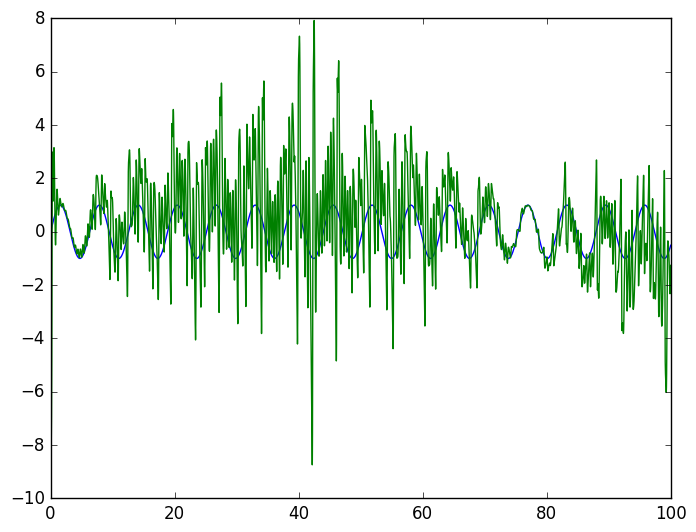

In [4]:
σ=16.
ρ=45.6
β=4.
fig = figure()
@manipulate for φ in .001:.01:.1
    withfig(fig) do

function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    
    m = sin(φ*t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

xs, ts = RK.integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3);
m=sin(ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
plot(ts,m)
plot(ts,mhat)
end
end